In [30]:
#importar módulos
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
#importar as duas bases de dados - DEMO_PHQ e PAG_HEI

df_phq = pd.read_csv('DEMO_PHQ.csv')
df_hei = pd.read_csv('PAG_HEI.csv')

In [32]:
#analisar primeiros dados dos dois dfs e tratamento de variáveis
df_phq.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


In [33]:
#lista das colunas do df_phq
df_phq.columns

Index(['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'DMDEDUC', 'INDFMINC'],
      dtype='object')

In [34]:
#dados faltantes
df_phq.isna().sum()

SEQN          0
DPQ010      498
DPQ020      498
DPQ030      498
DPQ040      498
DPQ050      498
DPQ060      498
DPQ070      498
DPQ080      498
DPQ090      498
RIAGENDR      0
RIDAGEYR      0
RIDRETH1      0
DMDEDUC       0
INDFMINC     47
dtype: int64

Pode-se notar que nesta base existem 498 entradas nulas nas colunas DPQ010 até a DPQ090. Porém não é possível saber se estão na mesma linha ou não. Próximo passo é verificar se correspondem ao mesmo participante.

<AxesSubplot:>

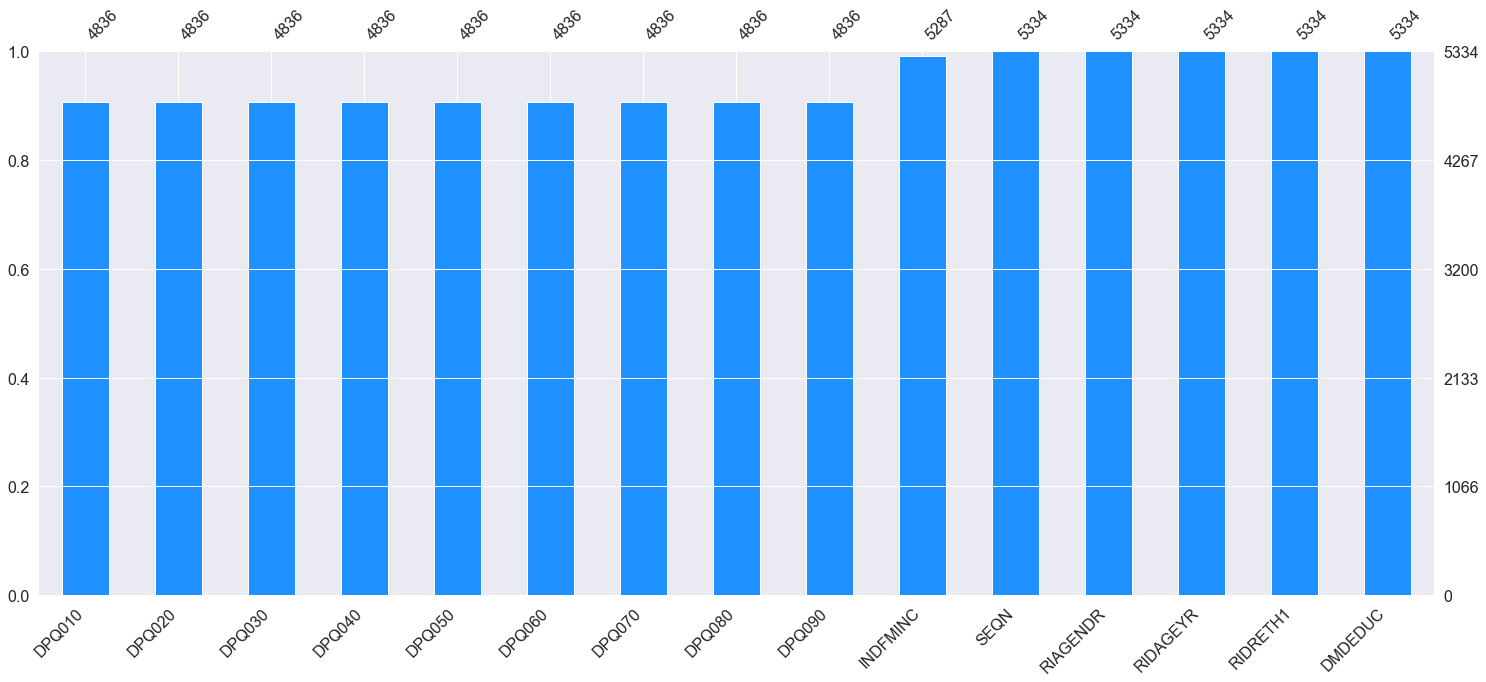

In [35]:
#outra forma de visualizar os dados faltantes com o missingno
msno.bar(df_phq,color="dodgerblue", sort="ascending")

<AxesSubplot:>

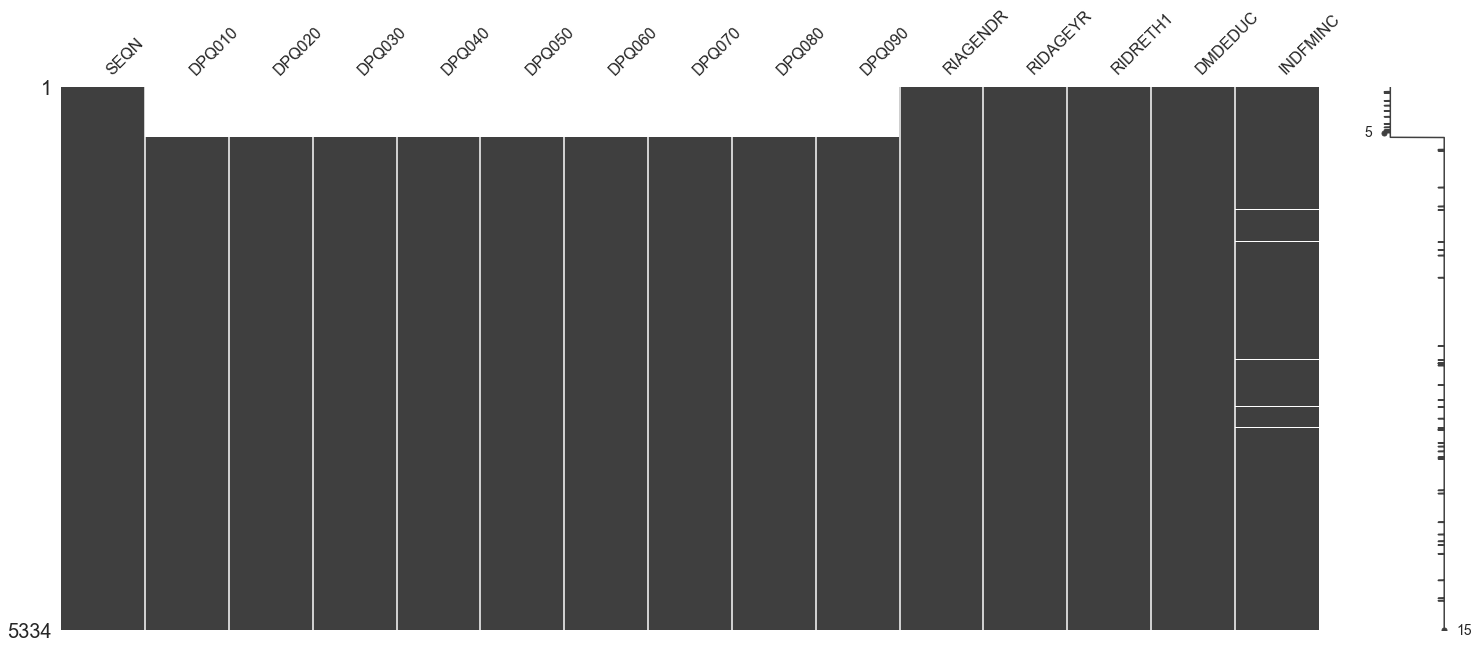

In [36]:
#utilizando o missingo para ter idéia da localização dos dados faltantes
#utilizando a função sort_values na coluna DPQ010
df_phq_missing = df_phq.sort_values(by = 'DPQ010' , na_position='first')
msno.matrix(df_phq_missing)

Analisando o resultado acima, vemos que os 498 dados faltantes das colunas DPQ010 até a DPQ090 estão no mesmo participante, por esta razão irei retirá-los do dataset. Apesar de serem apenas 47 observações faltantes na coluna INDFMINC, analisaremos estes dados para decidir se serão desconsiderados ou não.

In [37]:
df_phq_renda = df_phq[['RIAGENDR','RIDAGEYR', 'RIDRETH1',
       'DMDEDUC', 'INDFMINC']][df_phq['INDFMINC'].isna()]
df_phq_renda.head()

,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
147,2,20,1,2,NaN
356,2,23,1,3,NaN
420,1,22,1,2,NaN
446,2,22,5,5,NaN
474,2,28,1,3,NaN


In [38]:
df_phq_renda.groupby(['RIDRETH1','RIAGENDR','DMDEDUC']).count()

RIDAGEYR  INDFMINC
RIDRETH1 RIAGENDR DMDEDUC                    
1        1        1               4         0
                  2               3         0
                  3               4         0
                  4               1         0
         2        1               6         0
                  2               5         0
                  3               4         0
                  4               2         0
2        1        2               1         0
                  3               1         0
         2        2               2         0
                  3               1         0
3        1        2               1         0
                  3               2         0
                  5               3         0
         2        2               1         0
                  3               3         0
                  4               1         0
4        1        2               1         0
5        2        5               1         0

Neste caso, iremos preencher os valores faltantes com a moda das rendas. Uma vez que praticamente todos os faltantes são da mesma etinia e possuem escolaridade similar

In [39]:
df_phq.fillna(value={'INDFMINC':df_phq['INDFMINC'].mode}, inplace=True)

<AxesSubplot:>

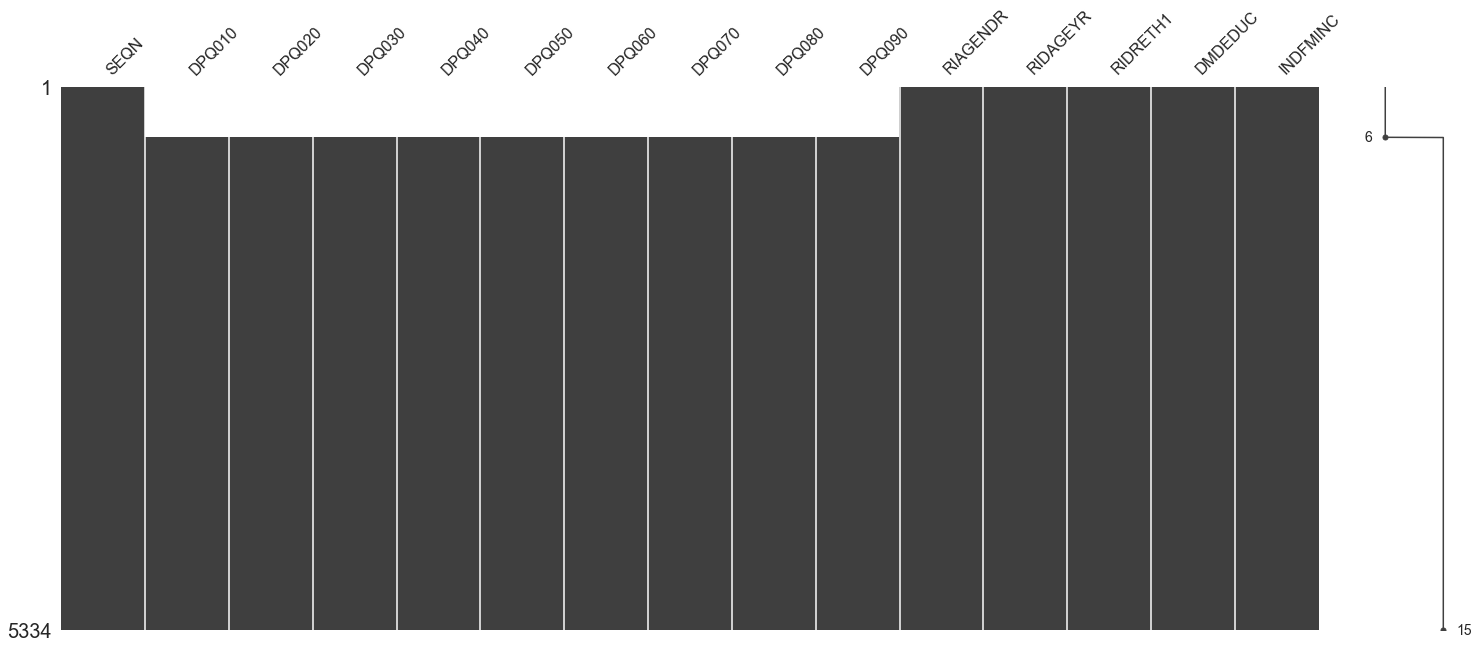

In [40]:
df_phq_missing = df_phq.sort_values(by = 'DPQ010' , na_position='first')
msno.matrix(df_phq_missing)

Agora irei dropar todas as linhas com valores nulos.

In [41]:
df_phq.dropna(inplace = True)

In [42]:
df_phq.reset_index(drop = True)

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
1,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
2,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
3,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0
4,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,19,3,4,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4831,41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2,3.0
4832,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1,8.0
4833,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4,2.0
4834,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,34,3,4,7.0


In [43]:
df_phq['INDFMINC'] = pd.to_numeric(df_phq['INDFMINC'].astype(str),errors='coerce')

In [44]:
df_nhanes = pd.merge(df_phq,df_hei, on = 'SEQN')
df_nhanes['RIAGENDR'] = df_nhanes['RIAGENDR'].astype('category')
df_nhanes.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
1,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
2,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
3,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393
4,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.444002,5.000000,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131


Criação de algumas variáveis para ajudar o processo de entendimento dos dados

In [45]:
df_nhanes['phq9'] = df_nhanes.loc[:,'DPQ010':'DPQ090'].sum(axis=1)

In [46]:
df_nhanes.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq9
0,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0
1,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0
2,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0
3,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0
4,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,5.000000,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131,6.0


In [47]:
'''
0 - sem sintomas
1 - sintomas leves
2 - sintomas moderados
3 - sintomas moderadamente severos
4 - sintomas severos
'''

condicoes = [
    (df_nhanes['phq9'] < 5),
    (df_nhanes['phq9'] >= 5)& (df_nhanes['phq9'] < 10),
    (df_nhanes['phq9'] >= 10)& (df_nhanes['phq9'] < 15),
    (df_nhanes['phq9'] >= 15)& (df_nhanes['phq9'] < 19),
    (df_nhanes['phq9'] >= 19),
]

df_nhanes['phq_grp'] = np.select(condicoes, [0, 1, 2, 3, 4], default=0)

In [48]:
df_nhanes.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq9,phq_grp
0,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,0
1,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,0
2,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,0
3,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0,0
4,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131,6.0,1


In [49]:
df_nhanes.columns

Index(['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'DMDEDUC', 'INDFMINC', 'PAG_MINW', 'ADHERENCE', 'HEI2015C1_TOTALVEG',
       'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT',
       'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY',
       'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID',
       'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT',
       'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE', 'phq9', 'phq_grp'],
      dtype='object')

In [55]:
uni_analise_vars = ['RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
                    'DMDEDUC', 'INDFMINC', 'PAG_MINW', 'ADHERENCE', 'HEI2015C1_TOTALVEG',
                    'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT',
                    'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY',
                    'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID',
                    'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT',
                    'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE', 'phq_grp']

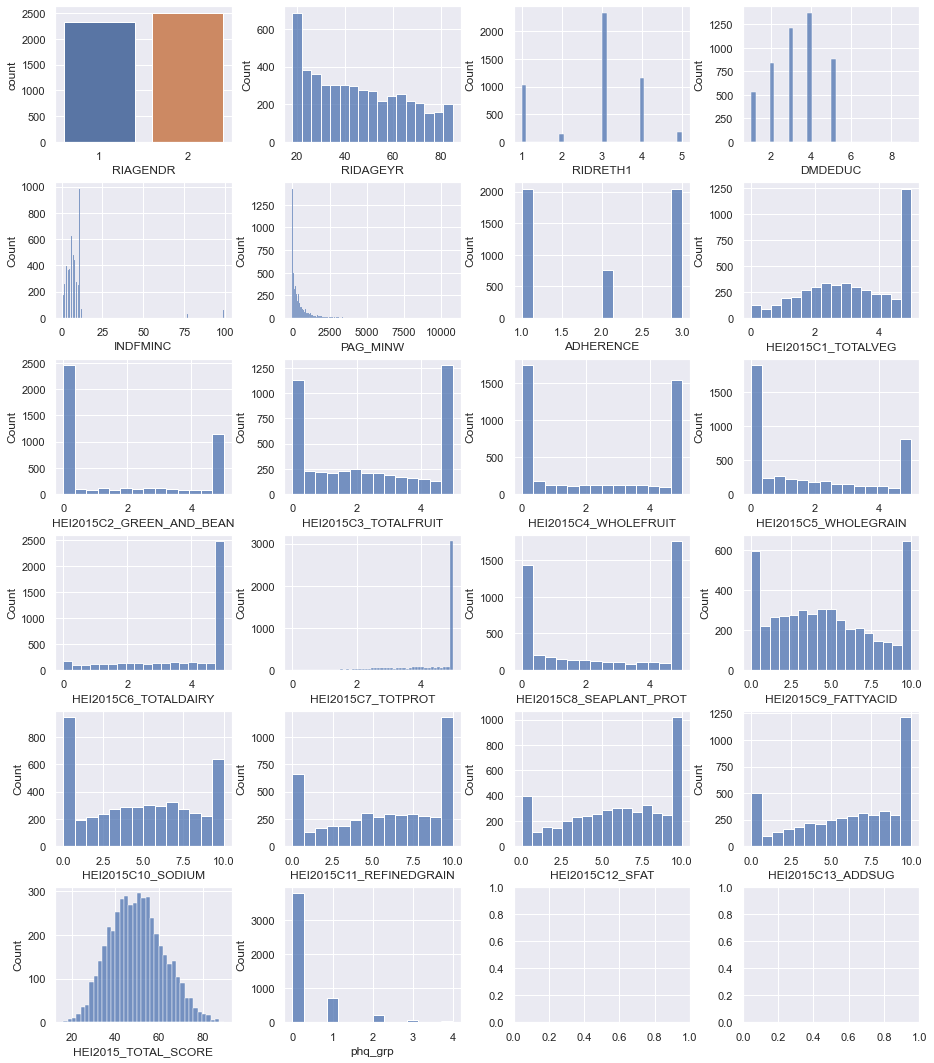

In [60]:
sns.set_theme()
n_rows , n_cols = 6,4
index = 0
fig,axs = plt.subplots(nrows = n_rows,ncols = n_cols)
fig.set_size_inches(15, 17) 
plt.subplots_adjust(left=0.13, right=0.93, top=2.5, bottom= 1.67, wspace= 0.3, hspace=0.3)

for row in range(n_rows):
    for col in range(n_cols):
        if index<len(uni_analise_vars):
            if index ==0:
                sns.countplot(x = uni_analise_vars[index], data = df_nhanes, ax = axs[row][col])
                index+=1
            else:
                sns.histplot(x = uni_analise_vars[index], data = df_nhanes,ax = axs[row][col])
                index+=1
             
plt.show()

In [ ]:
demographic_analysis = ['RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
                        'DMDEDUC', 'INDFMINC']

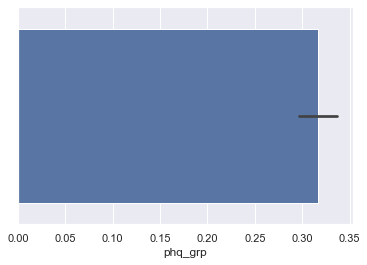

In [61]:
fig,axs = plt.subplots()
sns.barplot(x = x='phq_grp',data = df_nhanes)
plt.show()